## Datathon April 2019

In [1]:
import sqlalchemy as sql
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine

### Get and review the data

In [2]:
driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'cookies'

In [3]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [46]:
cookies = pd.read_sql_table(table_name='cookies_quality', con=connection_string)

In [47]:
cookies.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.3,3
1,2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,5,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.3,3


In [48]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 17 columns):
id                      5198 non-null int64
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5198 non-null object
crunch factor           5198 non-null object
aesthetic appeal        5198 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 690.4+ KB


We can see from the beggining that we will have to transform the crunchfactor from an object to a float

### Clean the data

First we try to find null values

In [49]:
cookies.isna().sum()

id                       0
sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   0
crunch factor            0
aesthetic appeal         0
dtype: int64

We have 5 NaN in 'sugar index' and 10 in 'bake time'. Lets find those values and understand why they are missing

In [50]:
cookies[cookies.isnull().any(axis=1)]

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
13,14,0.48,4.0,1860,64.0,150.0,0.99450,8.06,0.40,NaN,7,melted,12.8,7,"chocolate, oats",1.05,3
16,17,0.02,NaN,670,9.0,23.0,3.00000,8.47,0.67,9.4,6,cubed,14.0,7,"nuts, oats, chocolate",1.95,3
77,78,0.14,NaN,360,38.0,155.0,0.99622,8.27,0.50,9.4,7,melted,12.4,7,raisins,1.82,3
173,174,0.25,9.8,490,59.5,137.0,0.99500,8.16,0.38,NaN,8,melted,13.2,7,"chocolate, oats",1.46,3
484,485,0.33,2.9,440,21.0,73.0,0.98896,8.17,0.32,NaN,10,melted,11.2,7,"chocolate, oats",1.57,3
816,817,0.49,1.1,480,11.0,138.0,0.99290,8.01,0.42,NaN,7,melted,14.4,7,"nuts, chocolate",1.53,3
1209,1210,0.12,NaN,820,7.0,28.0,0.99700,8.37,0.50,9.4,6,cubed,15.6,7,"nuts,raisins",1.74,3
1562,1563,0.74,1.8,330,33.0,156.0,0.99100,8.29,0.52,NaN,8,melted,15.6,7,raisins,1.54,3
1867,1868,0.24,12.1,560,68.0,210.0,0.99718,8.05,0.50,NaN,7,melted,14.0,7,"nuts, chocolate",1.57,3
1933,1934,0.23,8.6,560,56.0,215.0,0.99670,8.17,0.44,NaN,7,melted,13.8,7,chocolate,1.74,3


There doesn't seem to be a good reason for not having the data so we can drop this columns

In [51]:
cookies.dropna(inplace=True)

In [52]:
cookies.isna().sum()

id                      0
sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
diameter                0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

Now we will try to find columns that offer redundant information

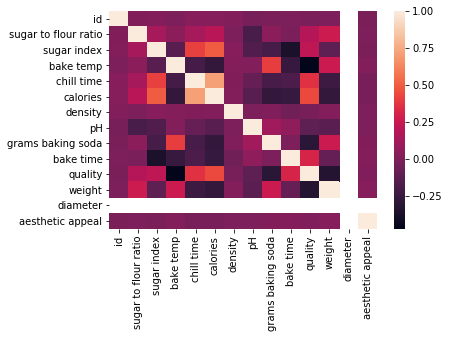

In [53]:
sns.heatmap(cookies.corr())

We can see that there is something weird happening with the diameter. Lets get the values in diameter

In [54]:
cookies.diameter.value_counts()

7    5183
Name: diameter, dtype: int64

We only have one value so we can drop the column as it doesn't give us information

In [55]:
cookies.drop(['diameter'], axis=1, inplace=True)

Also, the 'aesthetic appeal' column is weird, lets check.

In [56]:
cookies['aesthetic appeal'].value_counts()

3    5180
4       3
Name: aesthetic appeal, dtype: int64

In [57]:
cookies[cookies['aesthetic appeal']==4]

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,aesthetic appeal
20,21,0.33,7.0,240,14.0,130.0,0.99180,8.25,0.45,12.5,9,melted,15.2,"nuts, chocolate",1.97,4
1500,1501,0.59,1.4,730,23.0,42.0,0.99800,7.92,0.68,10.5,7,cubed,24.0,"nuts,raisins",1.5,4
4508,4509,0.00,2.7,1230,15.0,33.0,0.99538,8.44,0.63,11.3,6,cubed,13.6,"nuts, oats, chocolate",1.06,4


#### Decide what to do later with aesthetic

In [58]:
cookies.quality.value_counts()

8     1778
7     1316
9      706
6      614
5      577
10     135
4       44
3        8
11       5
Name: quality, dtype: int64

In [59]:
cookies.mixins.value_counts()

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
                                     2
peanut butter, raisins               1
Name: mixins, dtype: int64

Divide ingredients

In [60]:
cookies['butter type'].value_counts()

melted    3908
cubed     1275
Name: butter type, dtype: int64

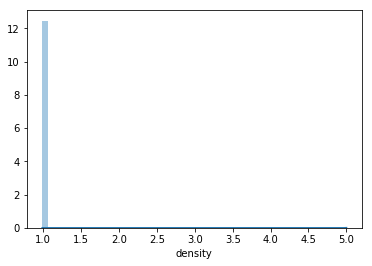

In [61]:
sns.distplot(cookies.density)

In [62]:
cookies[cookies['density']>1.1]

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,aesthetic appeal
3990,3991,0.24,6.8,570,41.0,163.0,5.0,8.2,0.41,9.9,8,melted,14.6,"nuts, chocolate",1.24,3


Maybe we should drop this row but lets see how it affects the model 

In [63]:
cookies[cookies['calories']<0]

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,aesthetic appeal
22,23,0.28,14.7,510,29.0,-99.0,0.99792,7.96,0.39,9.0,9,melted,14.0,"chocolate, oats",1.08,3
200,201,0.37,1.0,380,6.0,-99.0,0.99020,8.37,0.34,11.4,7,melted,11.2,raisins,1.67,3
906,907,0.26,2.1,830,17.0,-99.0,0.99616,8.29,0.56,9.8,6,cubed,14.8,"nuts, oats, chocolate",1.65,3
3099,3100,0.17,12.0,460,65.0,-99.0,0.99760,8.15,0.38,9.0,8,melted,12.0,raisins,1.33,3
4428,4429,0.26,9.7,300,39.0,-99.0,0.99080,8.08,0.56,12.9,9,melted,12.4,chocolate,1.82,3


This negative values are going to affect negatively to the model so we are going to drop them. Also there isn't any cookie with negative calories (Unfortunately...)

In [64]:
cookies = cookies[cookies['calories']>0]

Now we shoud separate the mixings in different columns

In [88]:
cookies['mixins'].value_counts()

chocolate                         1890
raisins                           1194
chocolate, oats                    744
nuts, chocolate                    518
nuts,raisins                       331
nuts, oats, chocolate              292
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
                                     2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [89]:
cookies['chocolate'] = cookies['mixins'].map(lambda x: 1 if 'chocolate' in x else 0)
cookies['nuts'] = cookies['mixins'].map(lambda x: 1 if 'nuts' in x else 0)
cookies['oats'] = cookies['mixins'].map(lambda x: 1 if 'oats' in x else 0)
cookies['raisins'] = cookies['mixins'].map(lambda x: 1 if 'raisins' in x else 0)
cookies['peanut_butter'] = cookies['mixins'].map(lambda x: 1 if 'peanut butter' in x else 0)

In [95]:
cookies.drop(columns='mixins', inplace=True)

In [96]:
cookies.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,aesthetic appeal,chocolate,nuts,oats,raisins,peanut_butter
0,1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,1.3,3,0,0,0,1,0
1,2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,1.71,3,0,0,0,1,0
2,3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,1.78,3,1,1,0,0,0
3,4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,1.59,3,1,0,0,0,0
4,5,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,1.3,3,1,1,1,0,0


Done! Now we take out the one cookie with negative wight

In [99]:
cookies = cookies[cookies['weight']>0]

ValueError: color kwarg must have one color per data set. 5175 data sets and 1 colors were provided

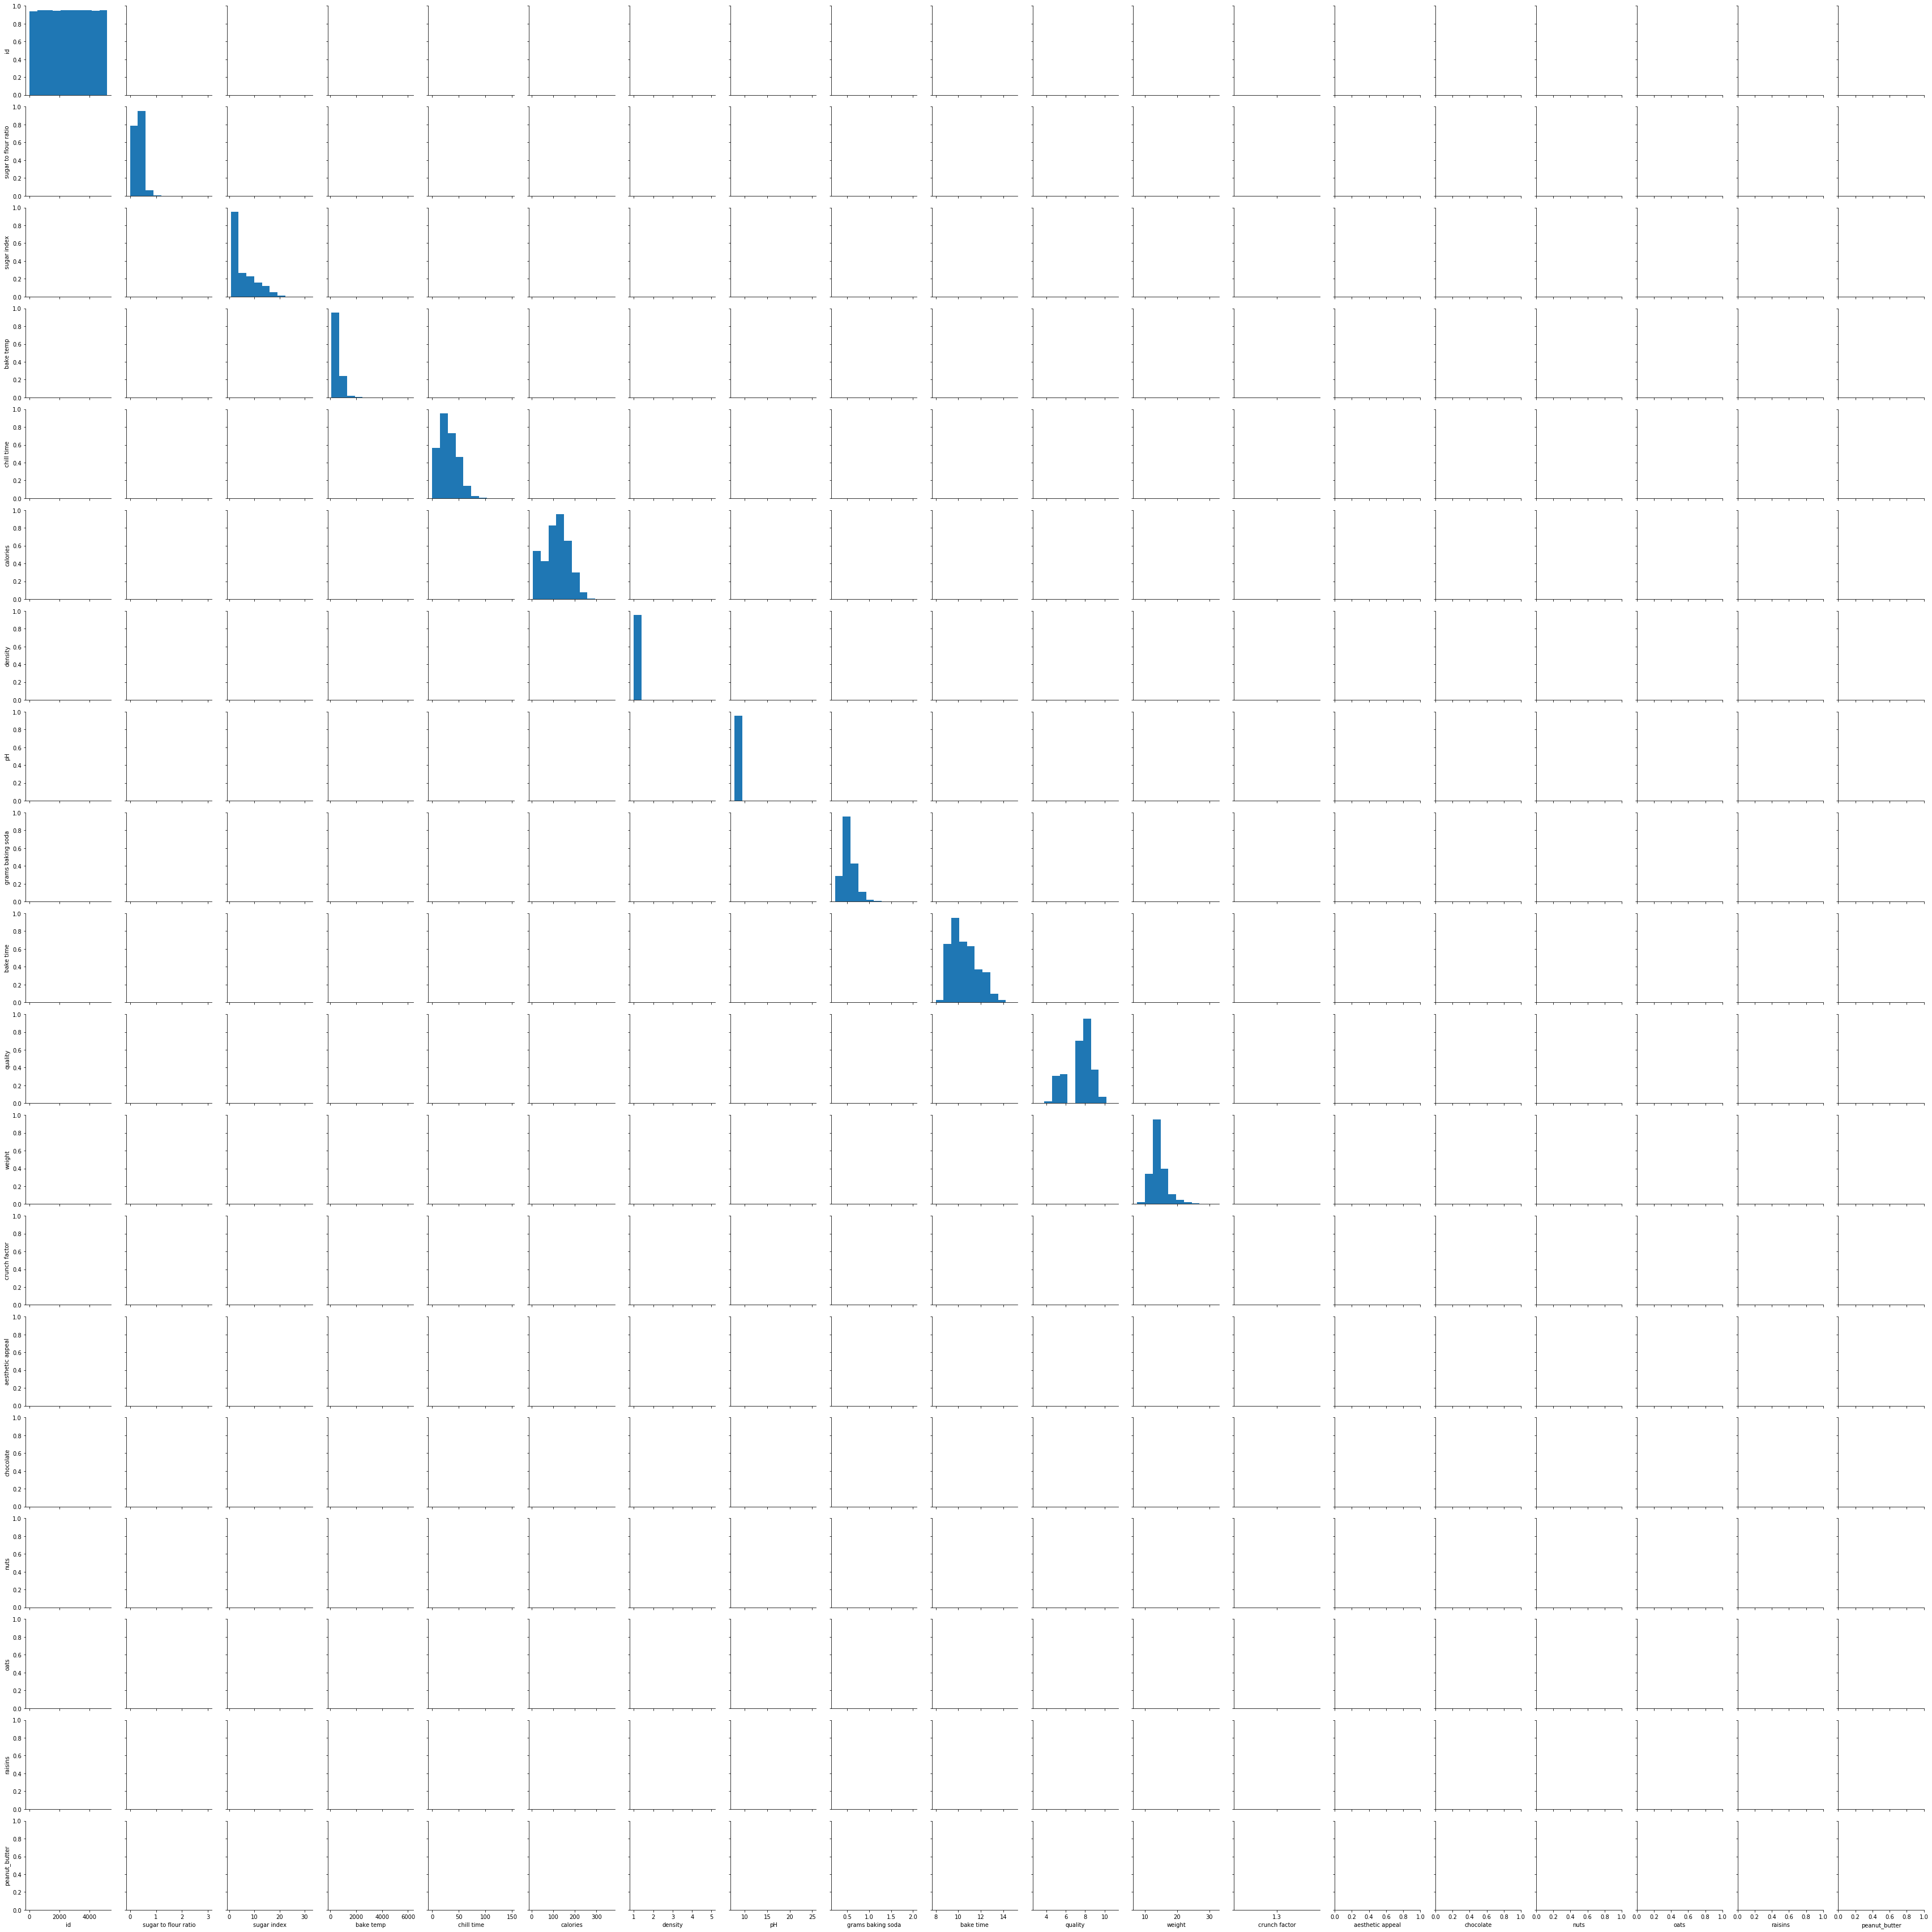

In [101]:
sns.pairplot(cookies)